In [1]:
import keras
keras.__version__

'2.12.0'

In [2]:
# !pip uninstall keras
# !pip install keras==2.12

Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? 
  Successfully uninstalled keras-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [2]:
!pip install keras_vggface

In [4]:
!pip install keras_applications

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random
import cv2
import os
import tensorflow as tf
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential                       # Functional API 사용 예정.
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.preprocessing import sequence, image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import mobilenet             # 비교적 작은 크기의 모형.
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from deepface.basemodels import VGGFace
warnings.filterwarnings('ignore')                               # Turn the warnings off.
%matplotlib inline

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
os.chdir('/content/drive/MyDrive/TensorFlow/99. Project/Face_Predict')

In [8]:
from keras_vggface.vggface import VGGFace

In [12]:
len(os.listdir('./Age'))

10275

In [11]:
df = pd.read_csv('./data01_undersampled.csv')
df

,file_name,age,gender,race,age_cat
0,56_1_0_20170117172544019.jpg.chip.jpg,56,1,0,50
1,50_0_0_20170104212134308.jpg.chip.jpg,50,0,0,50
2,45_0_0_20170111204133863.jpg.chip.jpg,45,0,0,40
3,27_0_0_20170114034255912.jpg.chip.jpg,27,0,0,20
4,26_0_0_20170105183712607.jpg.chip.jpg,26,0,0,20
...,...,...,...,...,...
10270,9_1_2_20161219190524395.jpg.chip.jpg,9,1,2,<20
10271,9_1_2_20161219192342173.jpg.chip.jpg,9,1,2,<20
10272,9_1_2_20161219204347420.jpg.chip.jpg,9,1,2,<20
10273,9_1_2_20170102235115156.jpg.chip.jpg,9,1,2,<20


In [14]:
import cv2

In [9]:
images = np.load('./Code/data_image_to_array.npy')
images.shape

(10275, 224, 224, 3)

In [12]:
y = df['age'].values
y

array([56, 50, 45, ...,  9,  9,  9])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(8220, 224, 224, 3)
(2055, 224, 224, 3)


In [18]:
vggface = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3),
                  pooling='avg')

In [19]:
vggface.trainable = False

In [20]:
vggface.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [32]:
output_layer = vggface.get_layer('pool5').output
x = Flatten(name='Flatten')(output_layer)
x = Dropout(rate=0.7, name='Dropout-1')(x)
x = Dense(units=128, activation='relu', name='Dense-1')(x)

x = Dense(units=128, activation='relu', name='Dense-3')(x)

x = Dense(units=1, activation='linear', name='Output')(x)

model_age = Model(inputs=vggface.input, outputs=x)

In [34]:
model_age.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [36]:
# Hyperparameters.
n_epochs = 200
batch_size = 32
learn_rate = 0.000001

In [37]:
optimizer = Adam(learning_rate=learn_rate)
model_age.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

In [38]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
check_point = ModelCheckpoint(filepath='./Code/CheckPoint/age_{epoch:02d}_{val_loss:.3f}.h5',
                              monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [39]:
os.listdir()

['Code',
 'sample01.ipynb',
 'sample02.ipynb',
 'kaggle.json',
 'UTKFace',
 'data01.csv',
 'keras_vggface',
 '.ipynb_checkpoints',
 'data01_undersampled.csv',
 'data01_undersampled_20.csv',
 'Train_Test_20.zip',
 'Train_Test_All.zip',
 'Test',
 'Train',
 'Age',
 'Age.zip',
 'Test_20',
 'Train_20']

In [40]:
summary = model_age.fit(X_train, y_train,
                        epochs=n_epochs, validation_split=0.2,
                        verbose=1, callbacks=[early_stop, check_point])

Epoch 1/200
206/206 [==============================] - ETA: 0s - loss: 1065.9247 - mse: 1065.9247
Epoch 1: val_loss improved from inf to 1065.73840, saving model to ./Code/CheckPoint/age_01_1065.738.h5
206/206 [==============================] - 36s 164ms/step - loss: 1065.9247 - mse: 1065.9247 - val_loss: 1065.7384 - val_mse: 1065.7384
Epoch 2/200
206/206 [==============================] - ETA: 0s - loss: 736.8455 - mse: 736.8455
Epoch 2: val_loss improved from 1065.73840 to 1050.77173, saving model to ./Code/CheckPoint/age_02_1050.772.h5
206/206 [==============================] - 31s 153ms/step - loss: 736.8455 - mse: 736.8455 - val_loss: 1050.7717 - val_mse: 1050.7717
Epoch 3/200
206/206 [==============================] - ETA: 0s - loss: 659.9525 - mse: 659.9525
Epoch 3: val_loss improved from 1050.77173 to 978.01984, saving model to ./Code/CheckPoint/age_03_978.020.h5
206/206 [==============================] - 31s 153ms/step - loss: 659.9525 - mse: 659.9525 - val_loss: 978.0198 - va

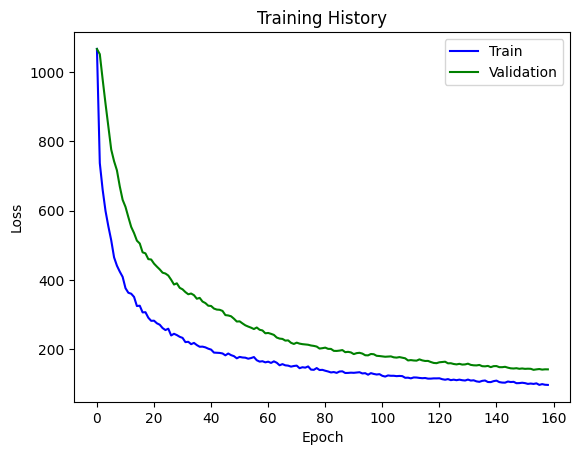

In [42]:
# 학습 history 출력.
n_skip = 0                 # Skip the first few steps.
plt.plot(summary.history['loss'][n_skip:], c="b")
plt.plot(summary.history['val_loss'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [2]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [14]:
pred_age = model_age.predict(X_test)
pred_age

65/65 [==============================] - 291s 4s/step


array([[39.99058  ],
       [25.608187 ],
       [22.027916 ],
       ...,
       [33.731323 ],
       [33.69879  ],
       [ 3.9052055]], dtype=float32)

In [15]:
MAE = mae(y_test, pred_age)
RMSE = np.sqrt(mse(y_test, pred_age))
print('MAE : ', np.round(MAE, 3))
print('RMSE : ', np.round(RMSE, 3))

MAE :  8.771
RMSE :  12.04
